In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CREDIT** **CARD FRAUD  DETECTION**


### **Libraries:**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import  confusion_matrix, accuracy_score
import joblib

**Importing training data**:

In [4]:
file_path = "/content/drive/My Drive/Colab Notebooks/fraudTrain.csv"

In [5]:
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## **EDA:**

In [6]:
df.shape

(1296675, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.rename(columns = {"Unnamed: 0" : "SNo.", "amt" : "amount", "lat" : "latitude", "long" : "longitude" }, inplace = True)
df.head(2)

,SNo.,trans_date_trans_time,cc_num,merchant,category,amount,first,last,gender,street,...,latitude,longitude,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [9]:
print(df.duplicated().sum)

<bound method Series.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Length: 1296675, dtype: bool>


In [10]:
# Rectifying for data-types

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df.head(1)

,SNo.,trans_date_trans_time,cc_num,merchant,category,amount,first,last,gender,street,...,latitude,longitude,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   SNo.                   1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amount                 1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [12]:
df.describe()

,SNo.,trans_date_trans_time,cc_num,amount,zip,latitude,longitude,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00
std,3.743180e+05,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02


In [13]:
print(df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [14]:
df.drop(columns=['SNo.', 'unix_time', 'trans_num', 'first', 'last'], inplace=True)

In [15]:
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amount,gender,street,city,state,zip,latitude,longitude,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0


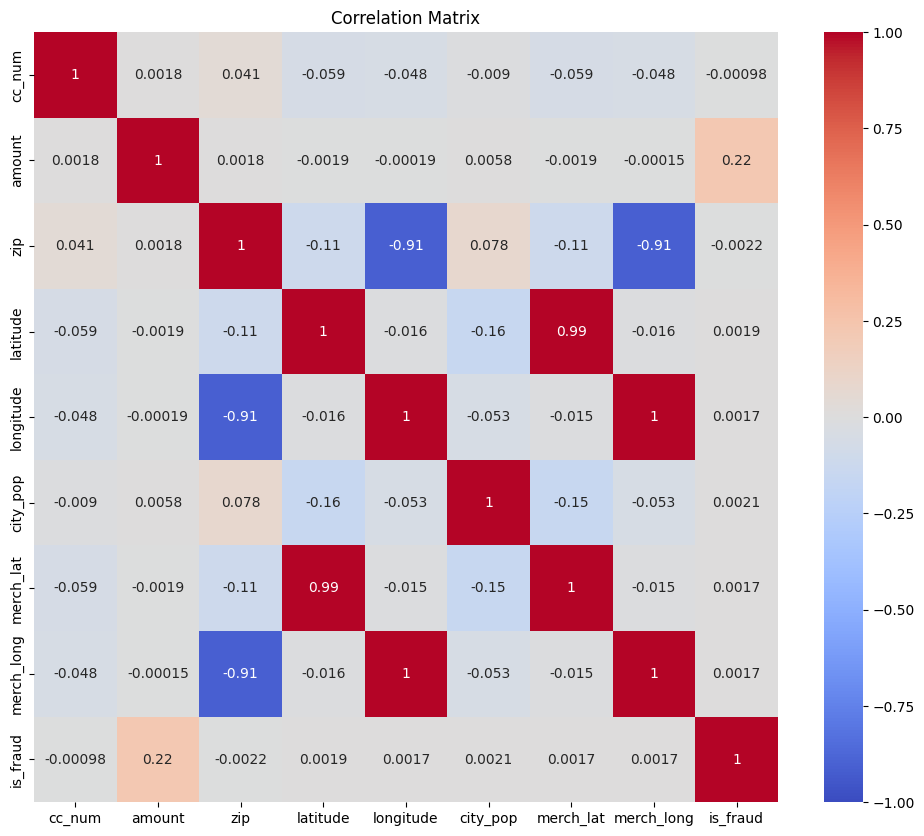

In [16]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.drop(columns=['merch_lat', 'merch_long'], inplace=True)
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amount,gender,street,city,state,zip,latitude,longitude,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0


In [18]:
df.head(5)


,trans_date_trans_time,cc_num,merchant,category,amount,gender,street,city,state,zip,latitude,longitude,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,0


In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['merchant', 'category', 'gender', 'street', 'city', 'state', 'job'], dtype='object')


In [20]:

fraud_df = df[df['is_fraud'] == 1]
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amount,gender,street,city,state,zip,latitude,longitude,city_pop,job,dob,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,1
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,1
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,F,94225 Smith Springs Apt. 617,Vero Beach,FL,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,1
1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,F,94225 Smith Springs Apt. 617,Vero Beach,FL,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,1
1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,M,458 Phillips Island Apt. 768,Denham Springs,LA,70726,30.4590,-90.9027,71335,Herbalist,1994-05-31,1
1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,F,63542 Luna Brook Apt. 012,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,1


In [21]:
df.drop(columns=["merchant"], inplace=True)

In [22]:
df.head(1)

,trans_date_trans_time,cc_num,category,amount,gender,street,city,state,zip,latitude,longitude,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0


In [23]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['category']=le.fit_transform(df['category'])
df['street']=le.fit_transform(df['street'])
df['job']=le.fit_transform(df['job'])
df['city']=le.fit_transform(df['city'])
df['state']=le.fit_transform(df['state'])

In [24]:
df.head(5)

,trans_date_trans_time,cc_num,category,amount,gender,street,city,state,zip,latitude,longitude,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,1988-03-09,0
1,2019-01-01 00:00:44,630423337322,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,1986-03-28,0


## **FEATURE ENGINEERING**

In [25]:
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month
df['day'] = df['trans_date'].dt.day
df['hour'] = df['trans_date'].dt.hour
df['minute'] = df['trans_date'].dt.minute

# Drop the original date column if needed
df = df.drop(columns=['trans_date_trans_time'])

In [26]:
df['trans_year'] = df['trans_date'].dt.year
df['trans_month'] = df['trans_date'].dt.month
df['trans_day'] = df['trans_date'].dt.day
df['trans_hour'] = df['trans_date'].dt.hour
df['trans_minute'] = df['trans_date'].dt.minute

# Drop the original 'trans_date' column if not needed
df = df.drop(columns=['trans_date'])


In [27]:
# Extract age or other useful components
df['dob_year'] = df['dob'].dt.year
df['dob_month'] = df['dob'].dt.month
df['dob_day'] = df['dob'].dt.day

# Calculate age from dob
df['age'] = (pd.Timestamp.now().year - df['dob_year'])

# Drop the original datetime column if it's not needed
df = df.drop(columns=['dob'])

In [28]:
# Fix the data type of 'age'
df['age'] = df['age'].astype(np.int64)



## **Model**

In [29]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
print(X_train.dtypes)

cc_num            int64
category          int64
amount          float64
gender            int64
street            int64
city              int64
state             int64
zip               int64
latitude        float64
longitude       float64
city_pop          int64
job               int64
year              int32
month             int32
day               int32
hour              int32
minute            int32
trans_year        int32
trans_month       int32
trans_day         int32
trans_hour        int32
trans_minute      int32
dob_year          int32
dob_month         int32
dob_day           int32
age               int64
dtype: object


In [31]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}


In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)


In [33]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))
    print(f'{name} AUC-ROC Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.97      0.76      0.85      2285

    accuracy                           1.00    389003
   macro avg       0.99      0.88      0.93    389003
weighted avg       1.00      1.00      1.00    389003

Random Forest AUC-ROC Score: 0.9877895724467486
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.83      0.63      0.72      2285

    accuracy                           1.00    389003
   macro avg       0.91      0.81      0.86    389003
weighted avg       1.00      1.00      1.00    389003

Gradient Boosting AUC-ROC Score: 0.9808985164193228
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.96  